In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
from torch import nn 
import torch.optim as optim
torch.cuda.is_available()

True

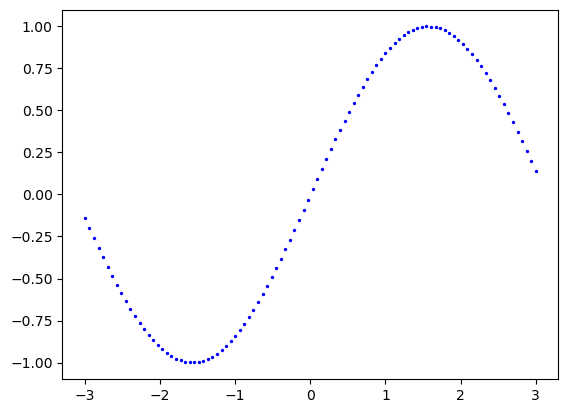

In [15]:
X = np.linspace(-3, 3, 100) 
Y = np.sin(X)  

plt.scatter(X, Y, c="b", s=2)

In [23]:
model = nn.Sequential(nn.Linear(1, 3), 
                      nn.Tanh(), 
                      nn.Linear(3, 1))

loss_fn = nn.MSELoss() # mean square error 
optimzer = optim.Adam(model.parameters(), lr=0.0001) 

X_train = torch.tensor(X, dtype=torch.float32) 
y_train = torch.tensor(Y, dtype=torch.float32)

n_epochs = 100 
batch_size = 1
batch_start = torch.arange(0, len(X), batch_size) 

best_mse = np.inf 
best_weights = None 
history = [] 

In [24]:
import tqdm

# training loop
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()

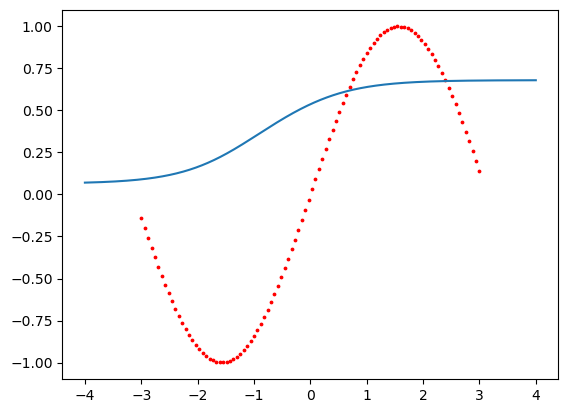

In [31]:
x_test = torch.tensor(np.linspace(-4, 4, 1000).reshape(-1, 1), dtype=torch.float32) 
y_test = model(x_test) 


plt.plot(x_test.detach().numpy(), y_test.detach().numpy())
plt.scatter(X, Y, c="r", s=3)